1.9490031133955787e-07
Este es v0:   1.9490031133955787e-07
152001117491.48242 7.871290546771839 31622400.0 527040.0


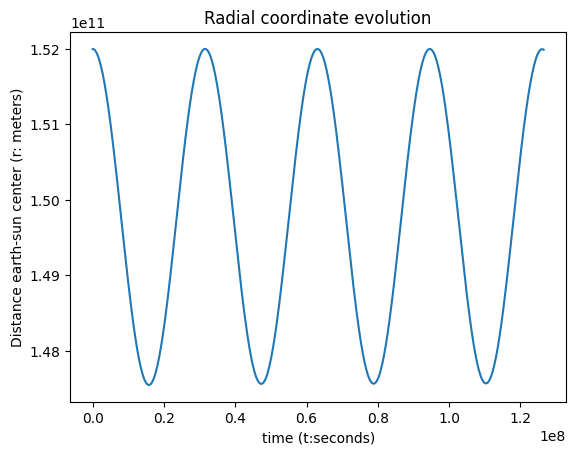

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import integrate
from scipy.optimize import fsolve

G = 6.67e-11
M_sun = 2e+30
Rt = 152e9


k = 1.
v0 = np.sqrt(G*M_sun/Rt**3)
print(v0)

print("Este es v0:   "+str(v0))

def System(t,r0):
    
    r,theta,vr,vtheta = r0
    
    ar = - G*M_sun/r**2 + r*vtheta**2
    at = - 2*vr*vtheta / r
    
    return np.array([vr,vtheta,ar,at])

theta0 = np.pi/2.
r0_ = np.array([ Rt*np.cos(theta0), Rt*np.sin(theta0) ])
alpha = np.deg2rad(83)#83
v0_ = np.array([ v0*np.cos(alpha), v0*np.sin(alpha) ])
N = 500
t = np.linspace(0.,4*31622400.,N+1) #  el tiempo es 365*24*3600

r0 = np.array([Rt,theta0,v0_[0],v0_[1]])
solution = solve_ivp( System, (t[0],t[-1]), r0, t_eval = t, method = 'RK45' )
t = solution.t
r = solution.y[0]
theta = solution.y[1]
ii = np.argmax(r)
maxr = r[ii]
maxtheta = theta[ii]
maxt = t[ii]
print(maxr,maxtheta,maxt, maxt/60.)


fig1 = plt.figure()
ax1 = fig1.add_subplot()
ax1.set_title("Radial coordinate evolution")
ax1.set_xlabel("time (t:seconds)")
ax1.set_ylabel("Distance earth-sun center (r: meters)")
ax1.plot(t,r)

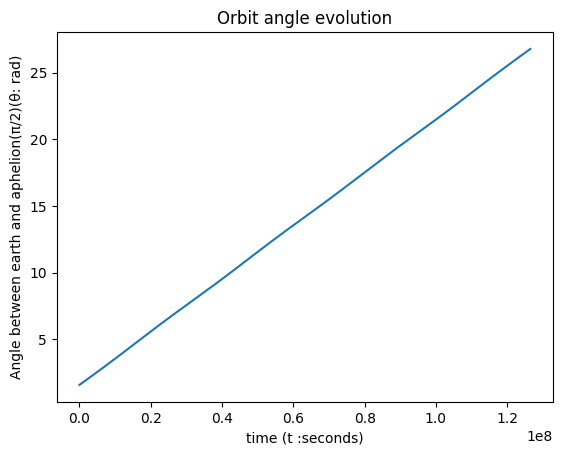

In [3]:
fig2 = plt.figure()
ax1 = fig2.add_subplot()
ax1.set_title("Orbit angle evolution")
ax1.set_xlabel("time (t :seconds)")
ax1.set_ylabel("Angle between earth and aphelion(π/2)(θ: rad)")
ax1.plot(t,theta)

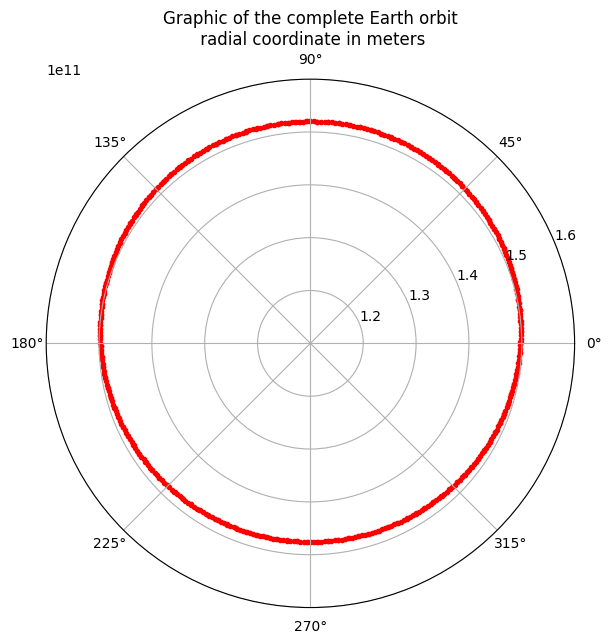

In [4]:
x = r*np.cos(theta)
y = r*np.sin(theta)
M = np.array([[0,-1],[1,0]])
v10_ = 100.0*np.dot( M, v0_ )
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1,2,1, projection='polar')
ax1.set_rlim(1.1e11,1.6e11)
ax1.set_title("Graphic of the complete Earth orbit\n radial coordinate in meters")

#ax2 = fig.add_subplot(1,2,2,)
ax1.scatter(theta,r,marker='.',color='r')


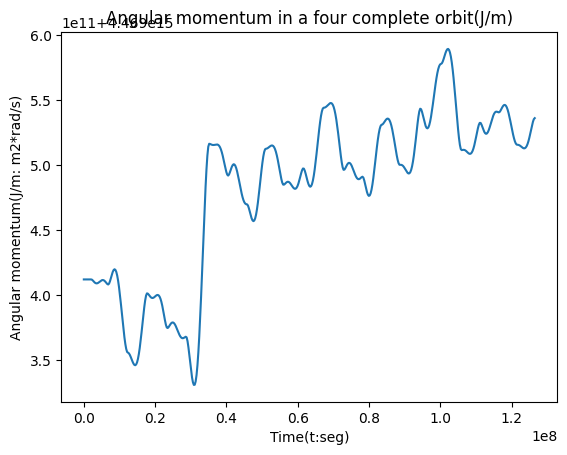

In [5]:

v_r = solution.y[2]
v_theta = solution.y[3]




fig = plt.figure()
ax = fig.add_subplot()
ax.set_title("Angular momentum in a four complete orbit(J/m)")
ax.set_xlabel("Time(t:seg)")
ax.set_ylabel("Angular momentum(J/m: m2*rad/s)")
ax.plot(t, v_theta*r**2)


In [6]:
ii = np.argmax(r)
maxr = r[ii]
jj = np.argmin(r)
minr = r[jj]
print(minr,maxr)

a = (maxr + minr)/2
T = 31622400 #segundos
resul = T**2/a**3  
resul_2 = 4*np.pi**2/(G*M_sun)
p = resul-resul_2
p

147548000247.3141 152001117491.48242


1.6890183947709036e-21

In [8]:
m_t = 6*10e24
E = M_sun*m_t*G/2*a
E_2 = 1/2 * m_t*(v_r**2 + J/(m_t*r**2)) - G*M_sun*m_t/r
J_square

149774558869.39825